## Load libs 

In [17]:
import requests
import os
import numpy as np
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import requests

## data paths and other constants

In [18]:
figure_path="pairplot.png"
local_data_path="pairplot.csv"
remote_data=f"https://s3.data.aip.de:9000/sh21pdf/gaiaedr3_sh_input_healpixlevel5_hpno-000001.fits.hdf5.txt"

## load remote public data

In [19]:
dfsh=pd.read_csv(StringIO(requests.get(remote_data).content.decode('utf-8')),delimiter="\s+",dtype={'#ID': 'int64'}).rename(columns={"#ID": "ID"})

# select data and store it locally

In [20]:
cols=["glon", "glat",  "teff50", "logg50", "dist50"]
pltdata=dfsh[cols].copy(deep=True)
pltdata.to_csv(local_data_path)

# Plot and save resuts to ~/data

2105


<Figure size 720x720 with 0 Axes>

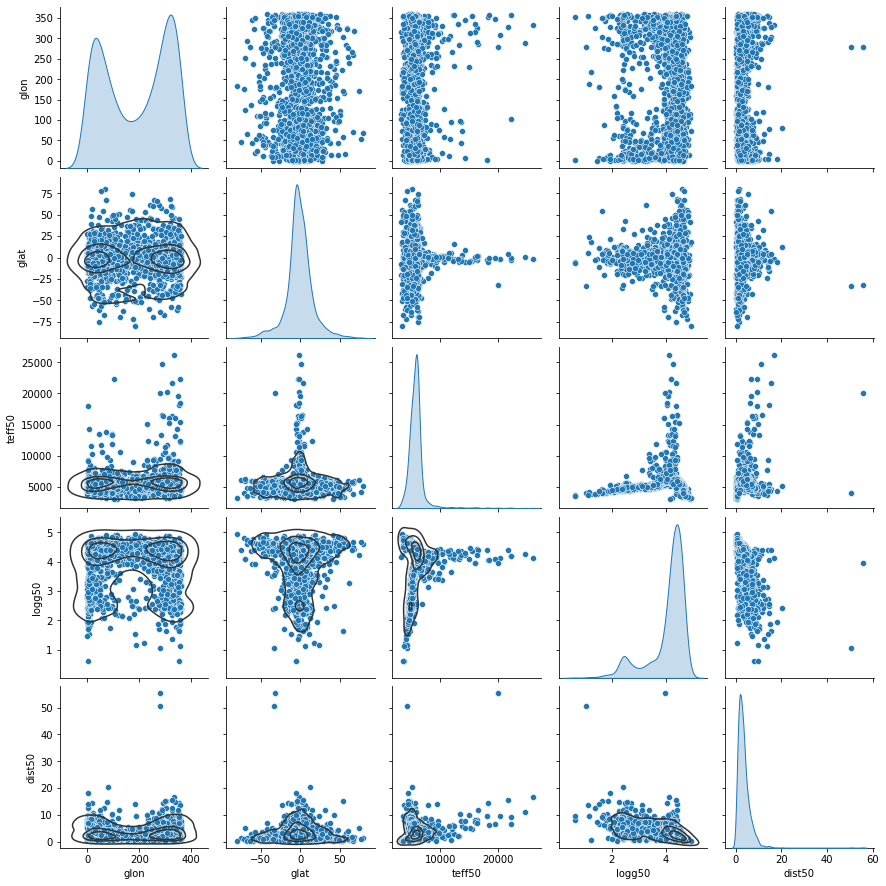

In [22]:
plt.figure(figsize=(10,10))
print(len(pltdata))
sns_plot = sns.pairplot(pltdata, diag_kind="kde")
sns_plot.map_lower(sns.kdeplot, levels=4, color=".2")
plt.savefig(figure_path)

In [1]:
import lmfit